In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc import imread, imshow, imresize
import cv2

In [2]:
df_train = pd.read_csv('../input/labels.csv')

In [3]:
df_train.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
df_train.describe()

,id,breed
count,10222,10222
unique,10222,120
top,4b5c813f99948df4f67b380f23f9d4de,scottish_deerhound
freq,1,126


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119]), <a list of 120 Text xticklabel objects>)

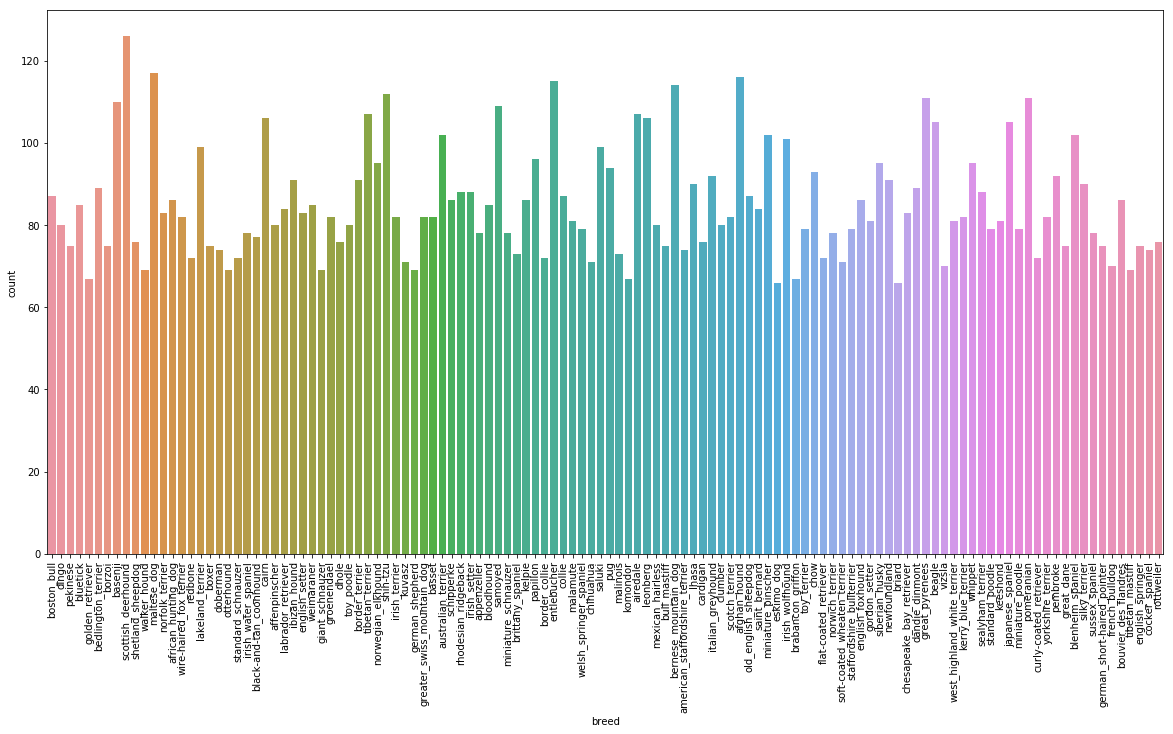

In [5]:
fig = plt.figure(figsize=(20,10))
sns.countplot(df_train['breed'])
plt.xticks(rotation = 90)

In [6]:
top_breed = sorted(df_train['breed'].value_counts().index)

In [7]:
top_breed[-16:-1]

['staffordshire_bullterrier',
 'standard_poodle',
 'standard_schnauzer',
 'sussex_spaniel',
 'tibetan_mastiff',
 'tibetan_terrier',
 'toy_poodle',
 'toy_terrier',
 'vizsla',
 'walker_hound',
 'weimaraner',
 'welsh_springer_spaniel',
 'west_highland_white_terrier',
 'whippet',
 'wire-haired_fox_terrier']

In [8]:
h_size = []
w_size = []

/home/tankinhbui/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


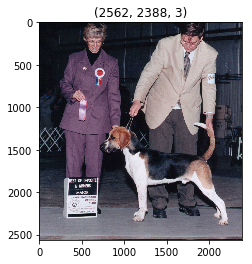

In [9]:
for img_id in df_train['id']:
    img = imread('../input/train/{}.jpg'.format(img_id))
    w_size.append(img.shape[0])
    h_size.append(img.shape[1])
    if img.shape[0] == 2562:
        plt.imshow(img)
        plt.title(img.shape)
plt.show()
    #print(img.shape)

In [10]:
max(w_size)

2562

In [11]:
min(w_size)

102

In [12]:
min(h_size)

97

In [13]:
w_size = np.array(w_size, np.int64)
h_size = np.array(h_size, np.int64)

In [14]:
w_size.mean()

386.74721189591077

In [15]:
h_size.mean()

443.33153981608297

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

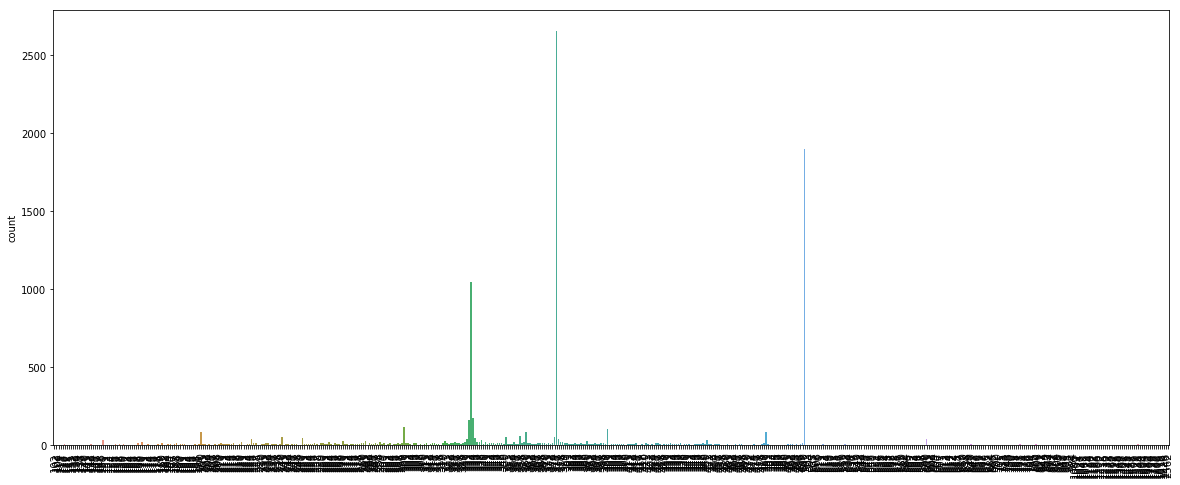

In [16]:
plt.figure(figsize=(20,8))
sns.countplot(w_size)
plt.xticks(rotation = 90)

/home/tankinhbui/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


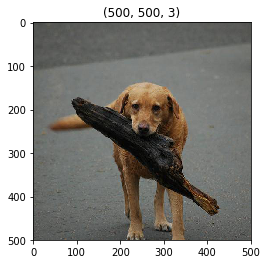

/home/tankinhbui/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


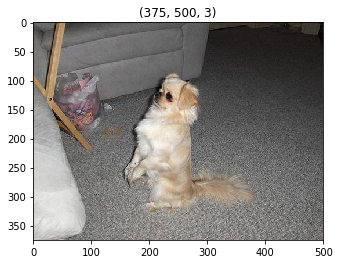

In [17]:

img  = imread('../input/train/{}.jpg'.format(df_train['id'][4]))
# titles = 'size of pic' + (str(img.shape[0]) + ',' + str(img.shape[1]) + ',' + str(img.shape[2])
plt.title(img.shape)
plt.imshow(img)
plt.show()

img  = imread('../input/train/{}.jpg'.format(df_train['id'][2]))
plt.imshow(img)
plt.title(img.shape)
plt.show()

In [18]:
g = imresize(img, (224,224,3))

/home/tankinhbui/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


In [ ]:
img

array([[[ 97,  96,  91],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 10,  12,  11],
        [ 10,  12,  11],
        [ 10,  12,  11]],

       [[ 99,  98,  93],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 18,  20,  19],
        [ 18,  20,  19],
        [ 18,  20,  19]],

       [[ 99,  98,  93],
        [ 99,  98,  93],
        [102, 101,  96],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]],

       ...,

       [[193, 192, 188],
        [194, 193, 189],
        [195, 194, 190],
        ...,
        [118, 117, 113],
        [130, 129, 125],
        [128, 127, 123]],

       [[199, 198, 194],
        [200, 199, 195],
        [201, 200, 196],
        ...,
        [116, 115, 110],
        [107, 106, 101],
        [108, 107, 102]],

       [[199, 198, 194],
        [200, 199, 195],
        [202, 201, 197],
        ...,
        [ 96,  96,  88],
        [ 93,  93,  85],
        [107, 107,  99]]

In [ ]:
img.shape

(375, 500, 3)

In [ ]:
g.shape

(224, 224, 3)

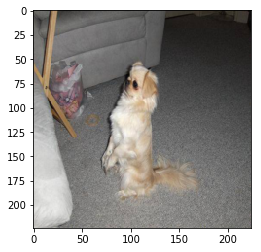

In [ ]:
plt.imshow(g)
plt.show()

In [3]:
targets_series = pd.Series(df_train['breed'])
one_hot = pd.get_dummies(targets_series, sparse = True)

In [4]:
one_hot_labels = np.asarray(one_hot)

In [5]:
one_hot_labels[2]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [42]:
i = 0
IMG_SIZE = 227
X_train = []
Y_train = []
for img_id, label in df_train.values:
    img = imread('../input/train/{}.jpg'.format(img_id))
    g = imresize(img, (IMG_SIZE, IMG_SIZE, 3))
    X_train.append(g)
    Y_train.append(one_hot_labels[i])
    i += 1

/home/tankinhbui/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/home/tankinhbui/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


In [43]:
X_train = np.array(X_train, np.int64)

In [46]:
X_train.shape

(10222, 227, 227, 3)

In [47]:
Y_train = np.array(Y_train)

In [48]:
Y_train.shape

(10222, 120)

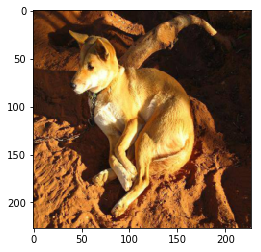

In [49]:
plt.imshow(X_train[1])

In [50]:
X_train.max()

255

In [51]:
X_train = np.array(X_train, np.float16) / 255

MemoryError: 

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 1)

In [20]:
X_train.shape

(7155, 224, 224, 3)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, Conv3D
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

In [32]:
model = Sequential()

model.add(Conv2D(filters = 96, kernel_size=(11,11), padding= 'Valid', strides=(4,4), activation = 'relu', input_shape =(224,224,3)))
# => 55x55x96
model.add(MaxPool2D(pool_size=(5,5), strides=(2,2))) #=> 27x27x96

model.add(Conv2D(filters = 256, kernel_size=(5,5), padding= 'Same', activation = 'relu'))# => 27x27x256
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))# => 13x13x256
model.add(Dropout(0.25))

model.add(Conv2D(filters = 384, kernel_size=(3,3), padding= 'Same', activation = 'relu')) #=> 13x13x256
model.add(Conv2D(filters = 256, kernel_size=(3,3), padding= 'Same', activation = 'relu')) #=> 13x13x256
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2))) #=> 6x6x256
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4096, activation='softmax'))
          

In [33]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [34]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [35]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [36]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 96)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 256)       614656    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 384)       885120    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 256)       884992    
__________

In [39]:
# Fit the model
history = model.fit(X_train,Y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, callbacks=[learning_rate_reduction])

ValueError: Error when checking target: expected dense_2 to have shape (4096,) but got array with shape (120,)